https://learnopencv.com/intersection-over-union-iou-in-object-detection-and-segmentation/

In [1]:
import numpy as np

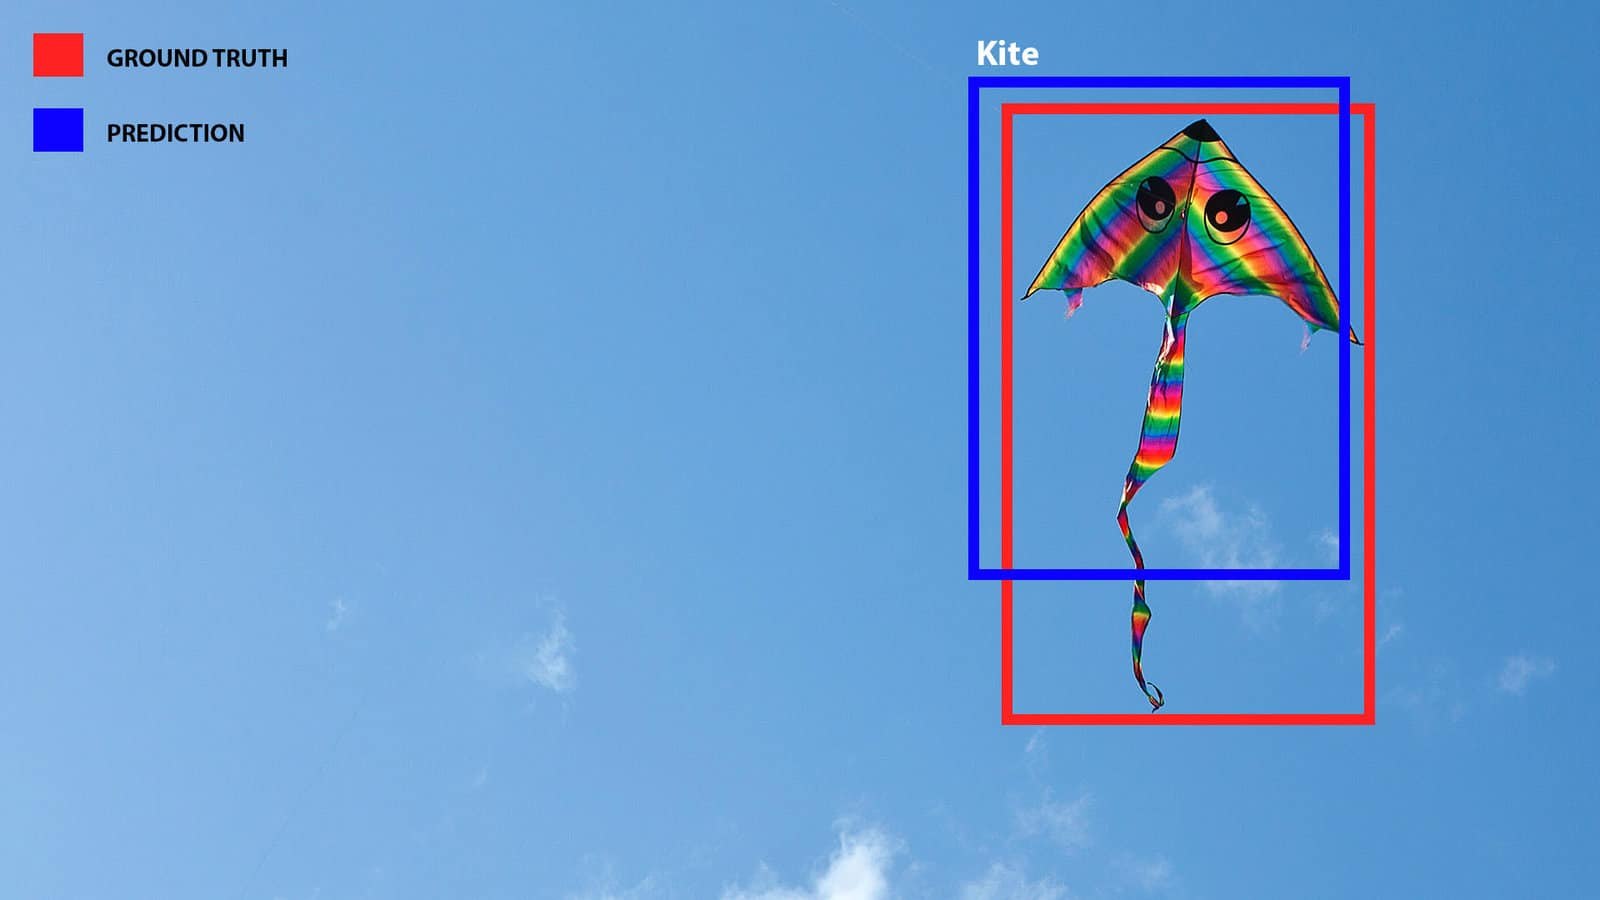

# Defining a Function to Calculate IoU

In [2]:
def get_iou(ground_truth, pred):
  # coordinates of the area of intersection.
  ix1 = np.maximum(ground_truth[0], pred[0])
  iy1 = np.maximum(ground_truth[1], pred[1])
  ix2 = np.minimum(ground_truth[2], pred[2])
  iy2 = np.minimum(ground_truth[3], pred[3])
  print(ix1,' - ',iy1,' - ' , ix2, ' - ', iy2)

  # Intersection height and width.
  i_height = np.maximum(iy2 - iy1 + 1, np.array(0.))
  i_width = np.maximum(ix2 - ix1 + 1, np.array(0.))
  print(i_height,' -- ',i_width)

  area_of_intersection = i_height * i_width
  print(area_of_intersection,' --- ')

  # Ground Truth dimensions.
  gt_height = ground_truth[3] - ground_truth[1] + 1
  gt_width = ground_truth[2] - ground_truth[0] + 1
  print(gt_height,' ---- ',gt_width)

  # Prediction dimensions.
  pd_height = pred[3] - pred[1] + 1
  pd_width = pred[2] - pred[0] + 1
  print(pd_height,' ----- ',pd_width)

  area_of_union = gt_height * gt_width + pd_height * pd_width - area_of_intersection
  print(area_of_union,' ------ ')

  iou = area_of_intersection / area_of_union

  return iou

In [3]:
ground_truth_bbox = np.array([1202, 123, 1650, 868], dtype=np.float32)

prediction_bbox = np.array([1162.0001, 92.0021, 1619.9832, 694.0033], dtype=np.float32)

In [4]:
iou = get_iou(ground_truth_bbox, prediction_bbox)
print('IOU: ', iou)

1202.0  -  123.0  -  1619.9832  -  694.0033
572.0032958984375  --  418.983154296875
239659.7451837361  --- 
746.0  ----  449.0
603.001220703125  -----  458.9830322265625
372061.58353090286  ------ 
IOU:  0.6441399913136432


# PyTorch Built-In Function for IoU

In [5]:
# Import dependencies.
import torch
from torchvision import ops

# Bounding box coordinates.
ground_truth_bbox = torch.tensor([[1202, 123, 1650, 868]], dtype=torch.float)
prediction_bbox = torch.tensor([[1162.0001, 92.0021, 1619.9832, 694.0033]], dtype=torch.float)

# Get iou.
iou = ops.box_iou(ground_truth_bbox, prediction_bbox)
print(iou)
print('IOU : ', iou.numpy()[0][0])

tensor([[0.6437]])
IOU :  0.6436676
